# Solving the Black-Scholes Equation Using Explicit Finite Difference

The **Black-Scholes equation** is a partial differential equation (PDE) used to model the price of financial derivatives, such as options. For a European call option, the equation is:

$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + r S \frac{\partial V}{\partial S} - r V = 0
$

Where:
- \( V(S, t) \) is the option price as a function of the underlying asset price \( S \) and time \( t \).
- \( \sigma \) is the volatility of the underlying asset.
- \( r \) is the risk-free interest rate.

---

## Boundary Conditions

1. **At maturity (\( t = T \))**:
   $
   V(S, T) = \max(S - K, 0)
   $
2. **At \( S = 0 \)**:
   $
   V(0, t) = 0
   $
3. **At \( S = S_{\text{max}} \)**:
   $
   V(S_{\text{max}}, t) = S_{\text{max}} - K e^{-r(T - t)}
   $

---

## Explicit Finite Difference Scheme

The explicit finite difference scheme involves discretizing the asset price \( S \) and time \( t \) into a grid and approximating the derivatives using finite differences.

### Discretization

1. **Asset Price Grid**:
   $
   S_i = i \cdot \Delta S, \quad \Delta S = \frac{S_{\text{max}}}{N_S}
   $
2. **Time Grid**:
   $
   t_n = n \cdot \Delta t, \quad \Delta t = \frac{T}{N_t}
   $

### Finite Difference Approximations

1. **First Derivative in \( S \)**:
   $
   \frac{\partial V}{\partial S} \approx \frac{V_{i+1, n} - V_{i-1, n}}{2 \Delta S}
   $
2. **Second Derivative in \( S \)**:
   $
   \frac{\partial^2 V}{\partial S^2} \approx \frac{V_{i+1, n} - 2 V_{i, n} + V_{i-1, n}}{\Delta S^2}
   $
3. **First Derivative in \( t \)**:
   $
   \frac{\partial V}{\partial t} \approx \frac{V_{i, n+1} - V_{i, n}}{\Delta t}
   $

### Update Rule

Substitute the finite difference approximations into the Black-Scholes equation and solve for \( V_{i, n+1} \):

$
V_{i, n+1} = V_{i, n} + \Delta t \left( \frac{1}{2} \sigma^2 S_i^2 \frac{V_{i+1, n} - 2 V_{i, n} + V_{i-1, n}}{\Delta S^2} + r S_i \frac{V_{i+1, n} - V_{i-1, n}}{2 \Delta S} - r V_{i, n} \right)
$

---

## Stability Condition

The explicit scheme requires the following stability condition:

$
\Delta t \leq \frac{\Delta S^2}{\sigma^2 S_{\text{max}}^2}
$

If this condition is not met, the solution may become unstable.


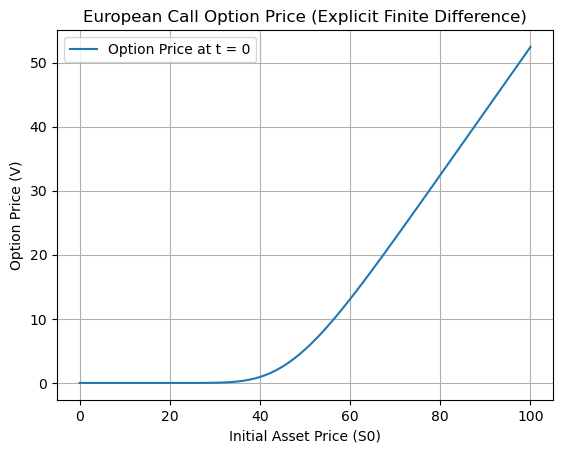

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S_max = 100  # Maximum asset price
T = 1        # Time to maturity (in years)
K = 50       # Strike price
r = 0.05     # Risk-free interest rate
sigma = 0.2  # Volatility

# Grid parameters
N_S = 100    # Number of asset price steps
N_t = 1000   # Number of time steps
dS = S_max / N_S  # Asset price step size
dt = T / N_t      # Time step size

# Asset price grid
S = np.linspace(0, S_max, N_S + 1)

# Initialize the option price grid
V = np.zeros((N_S + 1, N_t + 1))

# Payoff at maturity (boundary condition for a European call option)
V[:, -1] = np.maximum(S - K, 0)

# Explicit finite difference scheme
for n in range(N_t, 0, -1):  # Time steps (backward in time)
    for i in range(1, N_S):   # Spatial steps (excluding boundaries)
        # Finite difference approximations
        dV_dS = (V[i + 1, n] - V[i - 1, n]) / (2 * dS)
        d2V_dS2 = (V[i + 1, n] - 2 * V[i, n] + V[i - 1, n]) / (dS**2)
        
        # Update option price using explicit scheme
        V[i, n - 1] = V[i, n] + dt * (
            0.5 * sigma**2 * S[i]**2 * d2V_dS2 +
            r * S[i] * dV_dS -
            r * V[i, n]
        )
    
    # Boundary conditions
    V[0, n - 1] = 0  # At S = 0
    V[-1, n - 1] = S_max - K * np.exp(-r * (T - (n - 1) * dt))  # At S = S_max

# Plot the option price at t = 0
plt.plot(S, V[:, 0], label="Option Price at t = 0")
plt.xlabel("Initial Asset Price (S0)")
plt.ylabel("Option Price (V)")
plt.title("European Call Option Price (Explicit Finite Difference)")
plt.legend()
plt.grid()
plt.show()

If we provide the asset price at t=0, we can calculate option price V(t=0)

In [2]:
import numpy as np
from scipy.interpolate import interp1d

# Parameters
S0 = 55       # Current asset price
S_max = 100   # Maximum asset price
T = 1         # Time to maturity (in years)
K = 50        # Strike price
r = 0.05      # Risk-free interest rate
sigma = 0.2   # Volatility

# Grid parameters
N_S = 100     # Number of asset price steps
N_t = 1000    # Number of time steps
dS = S_max / N_S  # Asset price step size
dt = T / N_t      # Time step size

# Asset price grid
S = np.linspace(0, S_max, N_S + 1)

# Initialize the option price grid
V = np.zeros((N_S + 1, N_t + 1))

# Payoff at maturity (boundary condition for a European call option)
V[:, -1] = np.maximum(S - K, 0)

# Explicit finite difference scheme
for n in range(N_t, 0, -1):  # Time steps (backward in time)
    for i in range(1, N_S):   # Spatial steps (excluding boundaries)
        # Finite difference approximations
        dV_dS = (V[i + 1, n] - V[i - 1, n]) / (2 * dS)
        d2V_dS2 = (V[i + 1, n] - 2 * V[i, n] + V[i - 1, n]) / (dS**2)
        
        # Update option price using explicit scheme
        V[i, n - 1] = V[i, n] + dt * (
            0.5 * sigma**2 * S[i]**2 * d2V_dS2 +
            r * S[i] * dV_dS -
            r * V[i, n]
        )
    
    # Boundary conditions
    V[0, n - 1] = 0  # At S = 0
    V[-1, n - 1] = S_max - K * np.exp(-r * (T - (n - 1) * dt))  # At S = S_max

# Interpolate to find the option price at S0
option_price_interp = interp1d(S, V[:, 0], kind='linear')
option_price = option_price_interp(S0)

print(f"The European Call Option Price at S0 = {S0} is: {option_price:.4f}")

The European Call Option Price at S0 = 55 is: 8.8282


### Greeks

In [5]:
import numpy as np
from scipy.interpolate import interp1d

# Parameters
S0 = 55       # Current asset price
S_max = 100   # Maximum asset price
T = 1         # Time to maturity (in years)
K = 50        # Strike price
r = 0.05      # Risk-free interest rate
sigma = 0.2   # Volatility

# Grid parameters
N_S = 100     # Number of asset price steps
N_t = 1000    # Number of time steps
dS = S_max / N_S  # Asset price step size
dt = T / N_t      # Time step size

# Asset price grid
S = np.linspace(0, S_max, N_S + 1)

# Initialize the option price grid
V = np.zeros((N_S + 1, N_t + 1))

# Payoff at maturity (boundary condition for a European call option)
V[:, -1] = np.maximum(S - K, 0)

# Explicit finite difference scheme
for n in range(N_t, 0, -1):  # Time steps (backward in time)
    for i in range(1, N_S):   # Spatial steps (excluding boundaries)
        # Finite difference approximations
        dV_dS = (V[i + 1, n] - V[i - 1, n]) / (2 * dS)
        d2V_dS2 = (V[i + 1, n] - 2 * V[i, n] + V[i - 1, n]) / (dS**2)
        
        # Update option price using explicit scheme
        V[i, n - 1] = V[i, n] + dt * (
            0.5 * sigma**2 * S[i]**2 * d2V_dS2 +
            r * S[i] * dV_dS -
            r * V[i, n]
        )
    
    # Boundary conditions
    V[0, n - 1] = 0  # At S = 0
    V[-1, n - 1] = S_max - K * np.exp(-r * (T - (n - 1) * dt))  # At S = S_max

# Interpolate to find the option price and Greeks at S0
option_price_interp = interp1d(S, V[:, 0], kind='linear')
option_price = option_price_interp(S0)

# Calculate Delta (dV/dS)
delta_interp = interp1d(S, (np.gradient(V[:, 0], dS)), kind='linear')
delta = delta_interp(S0)

# Calculate Gamma (d^2V/dS^2)
gamma_interp = interp1d(S, (np.gradient(np.gradient(V[:, 0], dS), dS)), kind='linear')
gamma = gamma_interp(S0)

# Calculate Theta (dV/dt)
# Theta is computed as the rate of change of V with respect to time at t = 0
theta = (V[:, 0] - V[:, 1]) / dt  # Finite difference approximation
theta_interp = interp1d(S, theta, kind='linear')
theta_value = theta_interp(S0)

# Output results
print("Numerical Finite Difference Results:")
print(f"Call Option Price: {option_price:.4f}")
print(f"Delta: {delta:.4f}")
print(f"Gamma: {gamma:.4f}")
print(f"Theta (if it is coming positive then something is wrong): {theta_value:.4f}")

Numerical Finite Difference Results:
Call Option Price: 8.8282
Delta: 0.7956
Gamma: 0.0258
Theta (if it is coming positive then something is wrong): 3.3077


### Comparison with closed form

# Black-Scholes Closed-Form Formulas  

## 1. Option Price  

For a European call option, the Black-Scholes formula is:  

$
C(S,t) = S \cdot N(d_1) - K e^{-r(T-t)} \cdot N(d_2)
$

where:  

$
d_1 = \frac{\ln(S/K) + (r + \sigma^2 / 2) (T - t)}{\sigma \sqrt{T - t}}
$

$
d_2 = d_1 - \sigma \sqrt{T - t}
$

- \( N(\cdot) \) is the cumulative distribution function (CDF) of the standard normal distribution.  
- \( S \) is the current asset price.  
- \( K \) is the strike price.  
- \( T \) is the time to maturity.  
- \( r \) is the risk-free interest rate.  
- \( \sigma \) is the volatility.  

## 2. Greeks  

### Delta \( (\Delta) \):

$
\Delta = N(d_1)
$

### Gamma \( (\Gamma) \):

$
\Gamma = \frac{N'(d_1)}{S \sigma \sqrt{T - t}}
$

where \( N'(d_1) \) is the probability density function (PDF) of the standard normal distribution:

$
N'(d_1) = \frac{1}{\sqrt{2\pi}} e^{-d_1^2 / 2}
$

### Theta \( (\Theta) \):

$
\Theta = -\frac{S N'(d_1) \sigma}{2 \sqrt{T - t}} - r K e^{-r(T - t)} N(d_2)
$


In [4]:
import numpy as np
from scipy.stats import norm

# Parameters
S0 = 55       # Current asset price
K = 50        # Strike price
T = 1         # Time to maturity (in years)
r = 0.05      # Risk-free interest rate
sigma = 0.2   # Volatility

# Black-Scholes closed-form formulas
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

def black_scholes_gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def black_scholes_theta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    theta = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    return theta

# Compute option price and Greeks using closed-form formulas
call_price = black_scholes_call(S0, K, T, r, sigma)
delta = black_scholes_delta(S0, K, T, r, sigma)
gamma = black_scholes_gamma(S0, K, T, r, sigma)
theta = black_scholes_theta(S0, K, T, r, sigma)

# Output results
print("Closed-Form Black-Scholes Results:")
print(f"Call Option Price: {call_price:.4f}")
print(f"Delta: {delta:.4f}")
print(f"Gamma: {gamma:.4f}")
print(f"Theta: {theta:.4f}")

Closed-Form Black-Scholes Results:
Call Option Price: 8.8315
Delta: 0.7958
Gamma: 0.0258
Theta: -3.3060
